In [7]:
from time import time
from collections import Counter
from pathlib import Path
import pandas as pd
import numpy as np
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split, ShuffleSplit, cross_validate
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [8]:
training_df = pd.read_csv("data/cardiotocography_train.csv")
validation_df = pd.read_csv("data/cardiotocography_validation.csv")

In [9]:
training_df.head()

,LB,AC,FM,UC,ASTV,MSTV,ALTV,MLTV,DL,DS,...,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,NSP
0,130,10,54,1,34,2.1,0,3.0,0,0,...,50,182,8,0,159,151,155,25,1,1
1,120,4,23,5,36,1.5,0,13.5,0,0,...,62,174,6,0,119,129,125,42,0,1
2,133,0,0,4,20,2.7,0,18.5,6,0,...,63,161,7,0,136,124,134,61,1,1
3,136,4,0,5,46,0.8,1,7.4,0,0,...,119,158,1,1,144,143,145,1,0,1
4,130,6,557,6,29,1.7,0,7.8,5,0,...,65,177,6,1,133,129,133,27,0,1


In [56]:
# Testing for null data
training_df.isna().sum()

LB            0
AC            0
FM            0
UC            0
ASTV          0
MSTV          0
ALTV          0
MLTV          0
DL            0
DS            0
DP            0
Width         0
Min           0
Max           0
Nmax          0
Nzeros        0
Mode          0
Mean          0
Median        0
Variance      0
Tendency      0
NSP         367
dtype: int64

In [11]:
# Checking the datatypes
training_df.dtypes

LB            int64
AC            int64
FM            int64
UC            int64
ASTV          int64
MSTV        float64
ALTV          int64
MLTV        float64
DL            int64
DS            int64
DP            int64
Width         int64
Min           int64
Max           int64
Nmax          int64
Nzeros        int64
Mode          int64
Mean          int64
Median        int64
Variance      int64
Tendency      int64
NSP           int64
dtype: object

## Data Exploration

In [16]:
# Class labels
training_df['NSP'].value_counts()

# Less data for Pathologic and Suspect

1    1327
2     295
3     137
Name: NSP, dtype: int64

### Exploring corelation

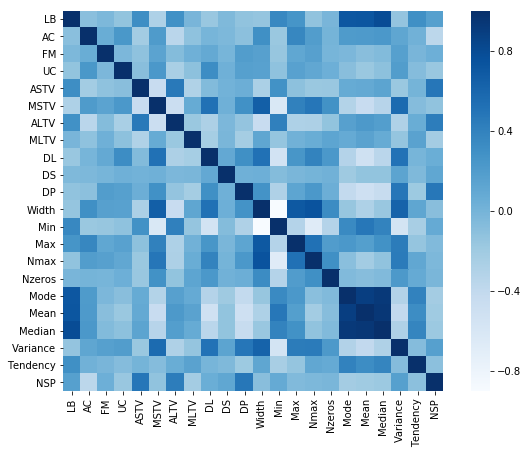

In [24]:
correlation_matrix = training_df.corr()
fig = plt.figure(figsize=(10, 7))
ax = plt.axes()
ax = sns.heatmap(correlation_matrix, mask=np.zeros_like(correlation_matrix, dtype=np.bool), cmap="Blues", square=True, ax = ax)
plt.show()

# Modelling Data

In [60]:
def applyRules():
    

In [86]:
# X_cols = ['LB', 'AC', 'FM', 'UC', 'ASTV', 'MSTV', 'ALTV', 'MLTV', 'DL', 'DS', 'DP', 'Width', 'Max', 'Nmax', 'Nzeros', 'Median', 'Variance', 'Tendency']
X_cols = ['AC', 'DP', 'LB', 'Median', 'Mode', 'MSTV', 'Mean', 'Width', 'ALTV', 'ASTV']
Y_cols = ['NSP']

In [146]:
X = training_df[training_df.columns[:-1]]
y = training_df[training_df.columns[-1]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# X_test = validation_df[validation_df.columns[:-1]]
# y_test = validation_df[validation_df.columns[-1]]

In [147]:
testing = validation_df[validation_df.columns[:-1]]

## Decision Tree

In [148]:
from sklearn.model_selection import cross_val_score

In [149]:
from sklearn.tree import DecisionTreeClassifier

In [150]:
# Training Decision tree
DT = DecisionTreeClassifier()

In [151]:
DT.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [153]:
y_train

1564    2
591     1
1567    2
341     1
147     1
360     1
83      1
48      1
468     1
155     1
1061    1
1226    1
1063    1
1433    1
500     1
179     1
1013    1
816     1
1268    1
528     1
346     1
1329    1
1719    2
643     1
886     1
999     1
601     1
1721    2
243     1
819     1
       ..
955     1
1215    1
385     1
805     1
1437    1
1515    2
343     1
769     1
1332    1
1685    2
130     1
1687    2
871     1
1123    3
1396    3
87      1
1482    2
330     1
1238    1
466     1
121     1
1638    2
1044    1
1724    2
1095    1
1130    1
1294    1
860     1
1459    1
1126    1
Name: NSP, Length: 1178, dtype: int64

In [154]:
y

0       1
1       1
2       1
3       1
4       1
5       1
6       1
7       1
8       1
9       1
10      1
11      1
12      1
13      1
14      1
15      1
16      1
17      1
18      1
19      3
20      1
21      1
22      1
23      1
24      1
25      1
26      3
27      1
28      1
29      1
       ..
1729    2
1730    2
1731    2
1732    2
1733    2
1734    2
1735    2
1736    2
1737    2
1738    2
1739    2
1740    2
1741    2
1742    2
1743    2
1744    2
1745    2
1746    2
1747    2
1748    2
1749    2
1750    2
1751    2
1752    2
1753    2
1754    2
1755    2
1756    2
1757    2
1758    2
Name: NSP, Length: 1759, dtype: int64

In [155]:
y_predict = DT.predict(testing)

In [144]:
y_predict

array([ 0,  8,  0,  0,  0,  0,  6,  1,  7,  0,  0,  5,  9,  0,  8,  4,  6,
        0,  9,  4,  1,  0,  2,  4,  0,  1,  0,  0,  3,  0,  0,  8,  0,  0,
        6,  0,  6,  3,  1,  4,  0,  0,  0,  1,  0,  6,  0,  0,  8,  0,  3,
        0,  5,  2,  1,  0,  0,  8,  4,  1,  0,  0,  0,  0,  7, 12,  3,  0,
        3,  3, 10,  0,  3,  2, 17,  4,  3,  5,  0,  0,  2,  4,  3,  1,  0,
        2,  2, 10, 16,  0,  3,  0,  7,  5,  0,  1,  0, 13,  0,  2,  1,  6,
        0,  0,  7,  0,  1,  5,  0,  8,  3, 10,  0,  3,  7,  3,  0,  6,  0,
        0,  0,  1,  0,  1,  3,  2,  6,  0,  5,  2,  8,  0,  3,  0,  1,  1,
        3,  0,  0,  5,  0,  2, 11,  0,  0,  5,  8,  3,  0,  0,  5,  3,  0,
        0,  0,  1,  0,  4,  7,  3,  0,  0,  0,  5,  3,  0,  5,  0,  8,  0,
        2,  7, 10,  0,  2, 14,  4,  0,  0,  0,  1,  4,  0,  0,  1,  1,  0,
        0,  0,  0,  4,  4,  0,  1,  0,  2,  2, 13,  0,  0,  7,  2,  0,  0,
        4,  4,  2,  1,  4, 18,  6,  0,  3,  0,  1,  1,  6,  1,  3,  0,  2,
        0,  0,  0,  0,  0

In [135]:
applyRules()

In [136]:
from sklearn.metrics import accuracy_score

In [137]:
accuracy_score(y_test, y_predict)

0.9913941480206541

In [158]:
def cross(model, true, test):
    scores = cross_val_score(model, true, test, cv=5, scoring='f1_macro')
    print(scores)

## Random Forest

In [95]:
from sklearn.ensemble import RandomForestClassifier

In [96]:
RF = RandomForestClassifier()

In [97]:
RF.fit(X_train, y_train)
rf_predict = RF.predict(X_test)

In [98]:
accuracy_score(y_test, rf_predict)

0.919104991394148

## SVM

In [81]:
from sklearn.svm import LinearSVC

In [82]:
SV = LinearSVC()

In [83]:
SV.fit(X_train, y_train)
SV_predict = SV.predict(X_test)

In [84]:
accuracy_score(y_test, SV_predict)

0.810671256454389

In [156]:
exportResults(DT.predict(testing))

In [157]:
def exportResults(prediction):
    pd.Series(prediction).to_csv("CAPTAIN_AMERICA.csv", sep=",", index=False)